<img src="Farinha de Trigo.jpg" align="center">

# UTILIZAÇÃO DE REDES NEURAIS ARTIFICIAIS PARA CLASSIFICAÇÃO DE FARINHA DE TRIGO EM UMA INDÚSTRIA DE BISCOITOS E MASSAS

### DISSERTAÇÃO DE MESTRADO


## Definição do Problema

Uma indústria de biscoitos e massas realiza a classificação de farinha de trigo para a utilização na sua produção, com base nas análises realizadas em seu laboratório físico-analítico.

### Qual é o problema que queremos resolver?

Realizar a classificação das farinhas para cada produto, retornando se ela está aprovada, aprovada condicional ou reprovada, de uma forma mais eficiente que a atual obtida na empresa.

## Métricas

Afinal, como saberemos que a solução encontrada está funcionando? Mais do que melhorar as técnicas de machine learning, precisamos definir quais serão as métricas de negócio/produto que iremos afetar. É importante escolher dois tipos de métricas:

- Primária
- Secundárias

Essas métricas devem ser usadas para definir o sucesso/fracasso do projeto
durante o teste em produção (por exemplo, teste A/B).

### Métrica Primária

Essa é a métrica principal do projeto, aquela que será medida em todos os estágios possíveis, principalmente durante o monitoramento em produção. No caso deste trabalho, o <b> percentual de classificações corretas de farinha de trigo para cada produto </b> será levada como a principal métrica.
Tudo o que faremos no projeto é voltado a melhorar essa métrica. Mas precisamos tomar cuidado, pois o fato de estarmos tentando afetá-la, a torna menos confiável.
A “Lei de Goodhart” diz: “Quando uma métrica se torna um alvo, ela deixa de ser uma boa métrica”. Por isso precisamos de…

### Métricas Secundárias

Não adianta melhorar o número de classificações corretas se o tempo para obter esse resultado é muito superior ao obtido hoje.
Por isso é importante, na maioria dos projetos de machine learning, ter várias métricas secundárias que tratem de monitorar outros passos e processos afetados por nossa solução.
Nosso objetivo não deve ser otimizar essas métricas diretamente ou tornaremos essas novas métricas primárias.
Devemos monitorar e entender o efeito de nossa solução. Na maioria dos casos o ideal é que essas métricas se mantenham no mesmo nível de antes da solução, pois o mais importante é monitorar a degradação. Se essas métricas secundárias melhorarem, podemos considerar como um bônus.
Não existem métricas secundárias específicas. Elas são qualquer métrica que seja importante para o processo e não seja a primária.
Então, além da nossa métrica primária, podemos ter:

- percentual de farinhas aprovadas
- percentual de farinhas aprovadas condicionalmente
- percentual de farinhas reprovadas
- tempo para obtenção dos resultados
    
## Preparação dos Dados

<p>Os dados para este estudo foram obtidos do banco de dados do ERP da empresa, portanto, os mesmos vieram em sua forma bruta, sem nenhum tipo de tratamento, mas exatamente como são obtidos e utilizados no processo diário de decisão. No quadro abaixo está disposto o <i> data dictionary </i> (do inglês, dicionário de dados), ou seja, indica quais as variáveis disponíveis no banco de dados e suas características.</p>

<table>
    <tr> <th>Variável</th> <th>Descrição</th> <th>Tipo de dado</th> </tr>
    <tr> 
        <td><center>Empresa</center></td>
        <td>Fornecedor da farinha de trigo</td>
        <td>Nome do fornecedor</td> 
    </tr>
    <tr>
        <td><center>Data Fabricação</center></td>
        <td>Data de fabricação da farinha de trigo, pelo fornecedor</td>
        <td>dd/mm/aaaa</td> 
    </tr>
    <tr>
        <td><center>Data Entrada</center></td>
        <td>Data de utilização da farinha no processo produtivo</td>
        <td>dd/mm/aaaa</td> 
    </tr>
    <tr>
        <td><center>UM</center></td>
        <td>Percentual de umidade da farinha de trigo</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>P</center></td>
        <td>Tenacidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>L</center></td>
        <td>Extensibilidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>P/L</center></td>
        <td>Relação tenacidade/extensibilidade</td>
        <td>sem unidade</td> 
    </tr>
    <tr>
        <td><center>W</center></td>
        <td>Força de glúten</td>
        <td>10<sup>-4</sup> J</td> 
    </tr>
    <tr>
        <td><center>Ie</center></td>
        <td>Índice de elasticidade</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>FN</center></td>
        <td><i>Falling Number</i> ou número de queda</td>
        <td>s</td> 
    </tr>
    <tr>
        <td><center>GU</center></td>
        <td>Glúten úmido</td>
        <td>g</td> 
    </tr>
    <tr>
        <td><center>GS</center></td>
        <td>Glúten seco</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Index</center></td>
        <td>Teor de glúten</td>
        <td>%</td>
    </tr>
    <tr>
        <td><center>Bu</center></td>
        <td>Cinzas em base úmida</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Bs</center></td>
        <td>Cinzas em base seca</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>L*</center></td>
        <td>Luminosidade</td>
        <td>escala de zero (preto) a 100 (branco)</td> 
    </tr>
    <tr>
        <td><center>a*</center></td>
        <td>Coordenada de cromaticidade a*</td>
        <td>varia de a* positivo (tonalidade vermelha)<p>até a* negativo (tonalidade verde)</p></td> 
    </tr>
    <tr>
        <td><center>b*</center></td>
        <td>Coordenada de cromaticidade b*</td>
        <td>varia de b* positivo (tonalidade amarela)<p>até b* negativo (tonalidade azul)</p></td> 
    </tr>
    <tr>
        <td><center>Produto</center></td>
        <td>Tipo do produto</td>
        <td>Nome do produto</td> 
    </tr>
    <tr>
        <td><center>Parecer</center></td>
        <td>Situação de aprovação da farinha de trigo</td>
        <td>Aprovado, Aprovado condicional ou Reprovado</td>
    </tr>
</table>
<p>Quadro 1 - Dicionário de dados do ERP da empresa.</p>
Fonte: Autoria própria, 2020

De acordo com XXX(XXXX), um dos maiores erros que se comete em <i>data science</i> é o de querer que os dados e as variáveis de um banco de dados ditos bruto (bancos de dados que não passaram por nenhum tratamento) estejam da melhor forma para extrair informações, o que leva a erros inesperados gerados por valores que não fazem sentido ou que não conseguem gerar informação útil. Dessa forma, fez-se a análise preliminar das variáveis e seus tipos de dados, indicados no Quadro 1.
As variáveis naturais (do banco de dados original) Data Fabricação e Data Entrada foram transformadas em apenas uma, a variável DU (Dias até a utilização), assim, transformando duas variáveis que seriam difíceis para se trabalhar em uma variável com informação densa, como pode ser observado no Quadro 2.

<table>
    <tr> <th>Variável</th> <th>Descrição</th> <th>Tipo de dado</th> </tr>
    <tr> 
        <td><center>Empresa</center></td>
        <td>Fornecedor da farinha de trigo</td>
        <td>Nome do fornecedor</td> 
    </tr>
    <tr>
        <td><center>DU</center></td>
        <td>Dias entre a fabricação da farinha de trigo <p>e sua utilização no processo produtivo</p></td>
        <td>dias</td> 
    </tr>
    <tr>
        <td><center>UM</center></td>
        <td>Percentual de umidade da farinha de trigo</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>P</center></td>
        <td>Tenacidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>L</center></td>
        <td>Extensibilidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>P/L</center></td>
        <td>Relação tenacidade/extensibilidade</td>
        <td>sem unidade</td> 
    </tr>
    <tr>
        <td><center>W</center></td>
        <td>Força de glúten</td>
        <td>10<sup>-4</sup> J</td> 
    </tr>
    <tr>
        <td><center>Ie</center></td>
        <td>Índice de elasticidade</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>FN</center></td>
        <td><i>Falling Number</i> ou número de queda</td>
        <td>s</td> 
    </tr>
    <tr>
        <td><center>GU</center></td>
        <td>Glúten úmido</td>
        <td>g</td> 
    </tr>
    <tr>
        <td><center>GS</center></td>
        <td>Glúten seco</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Index</center></td>
        <td>Teor de glúten</td>
        <td>%</td>
    </tr>
    <tr>
        <td><center>Bu</center></td>
        <td>Cinzas em base úmida</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Bs</center></td>
        <td>Cinzas em base seca</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>L*</center></td>
        <td>Luminosidade</td>
        <td>escala de zero (preto) a 100 (branco)</td> 
    </tr>
    <tr>
        <td><center>a*</center></td>
        <td>Coordenada de cromaticidade a*</td>
        <td>varia de a* positivo (tonalidade vermelha)<p>até a* negativo (tonalidade verde)</p></td> 
    </tr>
    <tr>
        <td><center>b*</center></td>
        <td>Coordenada de cromaticidade b*</td>
        <td>varia de b* positivo (tonalidade amarela)<p>até b* negativo (tonalidade azul)</p></td> 
    </tr>
    <tr>
        <td><center>Produto</center></td>
        <td>Tipo do produto</td>
        <td>Nome do produto</td> 
    </tr>
    <tr>
        <td><center>Parecer</center></td>
        <td>Situação de aprovação da farinha de trigo</td>
        <td>Aprovado, Aprovado condicional ou Reprovado</td>
    </tr>
</table>
<p>Quadro 2 - Dicionário de dados pós análise preliminar de variáveis.</p>
Fonte: Autoria própria, 2020

 
### Variable notes

Para a melhor interpretação dos resultados que posteriormente surgirão, as variáveis com que trabalhamos devem ser explicitamente explicadas. Para tal, seguem as notas sobre as variáveis do Quadro 2.

**Empresa:** a variável empresa refere-se aos fornecedores da farinha de trigo, em outras palavras, são as empresas que realizam a transformação do grão do trigo em farinha, cada qual com seus próprios fornecedores de grãos, o que as torna uma variável preliminarmente importante para o nosso estudo, uma vez que trigos produzidos em condições diferentes geram farinhas diferentes.

## Data analisys

### Análise exploratória de dados

#### Importando bibliotecas

Para iniciar a análise, as bibliotecas pandas, seaborn e matplotlib foram importadas

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#### Atribuindo o Dataset para um Dataframe

In [2]:
df = pd.read_excel('base_dados_farinha.xlsx')

In [3]:
df.sample(5)

,Empresa,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*,Produto,Parecer
6165,COOPAVEL,11,13.6,74.0,86.0,0.86,197.0,48.9,345.0,31.15,10.75,97.60,0.73,0.84,90.22,0.41,11.16,BISCOITO,Aprovado
4178,MOCCA,3,13.4,90.0,75.0,1.20,223.0,50.5,243.0,31.10,10.55,97.85,0.73,0.84,89.31,0.49,11.20,BISCOITO,Ap. Condicional
5816,MOCCA,8,14.9,123.0,57.0,2.16,263.0,51.4,309.0,24.90,8.35,96.95,0.45,0.52,93.07,-0.54,10.41,MASSA ESPECIAL,Aprovado
3712,TRADIÇÃO,2,12.7,53.0,100.0,0.53,169.0,55.2,308.0,27.70,9.00,92.25,0.58,0.66,90.90,-0.21,11.48,BISCOITO SALGADO,Aprovado
4927,INFASA,4,12.9,96.0,72.0,1.33,215.0,44.6,387.0,29.20,9.50,94.80,0.97,1.11,90.15,0.37,10.97,BISCOITO,Aprovado


#### Verificação de colunas e tipos de dados

Para iniciar as análises, é necessário que a biblioteca pandas tenha entendido todos os dados tais quais eles são, ou seja, numéricos, que se dividem em inteiros (int64) e de ponto flutuante (float64), ou <i>strings</i> (object).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Empresa  6644 non-null   object 
 1   DU       6644 non-null   int64  
 2   UM (%)   6644 non-null   float64
 3   P        6644 non-null   float64
 4   L        6644 non-null   float64
 5   P/L      6644 non-null   float64
 6   W        6644 non-null   float64
 7   Ie       6644 non-null   float64
 8   FN       6644 non-null   float64
 9   GU       6644 non-null   float64
 10  GS       6644 non-null   float64
 11  Index    6644 non-null   float64
 12  Bu       6644 non-null   float64
 13  Bs       6644 non-null   float64
 14  L*       6644 non-null   float64
 15  a*       6644 non-null   float64
 16  b*       6644 non-null   float64
 17  Produto  6644 non-null   object 
 18  Parecer  6644 non-null   object 
dtypes: float64(15), int64(1), object(3)
memory usage: 986.3+ KB


In [5]:
df.describe()

,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*
count,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.00000,6644.000000,6644.000000,6644.000000
mean,4.034317,13.449944,112.731475,69.395948,1.966612,260.524132,50.661645,318.810738,27.747228,9.459468,93.466837,0.689959,0.71893,91.390709,-0.041943,10.955793
std,8.238962,0.837526,29.527988,21.153704,5.275270,75.505546,18.266299,57.704422,5.195007,2.795201,15.559723,2.637186,1.74849,2.970869,0.472807,1.536520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.39000,0.000000,-1.910000,0.000000
25%,1.000000,13.100000,92.000000,54.000000,1.140000,222.000000,47.700000,292.000000,26.400000,9.000000,94.900000,0.440000,0.51000,90.140000,-0.380000,10.540000
50%,2.000000,13.500000,116.000000,68.000000,1.710000,262.000000,52.300000,320.000000,28.300000,9.550000,97.200000,0.560000,0.65000,91.650000,-0.080000,10.950000
75%,4.000000,13.900000,133.000000,81.000000,2.410000,301.000000,55.800000,346.000000,30.100000,10.150000,98.300000,0.720000,0.82000,92.642500,0.310000,11.350000
max,303.000000,15.800000,453.000000,501.000000,305.000000,3214.000000,556.000000,878.000000,96.200000,94.000000,99.900000,98.000000,87.00000,97.870000,3.490000,90.280000


Com o intuito de analisar a interdependência das variáveis, para mensurar a correlação entre as mesmas, procurou-se calcular e apresentar um mapa de calor. Dentre as correlações encontradas, a mais forte ocorreu de forma inversamente proporcional a nível moderado, entre P e L, sendo que todas as demais estão a níveis desprezíveis, interpretando os valores através da correlação de Pearson.

In [6]:
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*
DU,1.0,-0.061,0.0064,-0.00036,-0.0031,0.018,-0.036,0.00028,-0.013,-0.015,-0.052,0.0043,0.0067,-0.046,0.071,-0.025
UM (%),-0.061,1.0,0.15,-0.015,0.026,0.14,0.095,0.15,-0.0028,0.0037,0.09,-0.024,-0.028,0.12,-0.21,-0.043
P,0.0064,0.15,1.0,-0.61,0.15,0.54,0.035,0.17,-0.15,-0.067,0.031,-0.0025,-0.029,0.18,-0.19,-0.091
L,-0.00036,-0.015,-0.61,1.0,-0.17,-0.057,0.14,-0.085,0.31,0.18,0.054,0.002,0.014,-0.078,0.12,-0.0091
P/L,-0.0031,0.026,0.15,-0.17,1.0,0.014,0.12,-0.023,-0.052,-0.031,0.00029,-0.0013,-0.0032,0.025,-0.029,-0.021
W,0.018,0.14,0.54,-0.057,0.014,1.0,0.22,0.17,0.083,0.081,0.11,-0.0012,-0.028,0.14,-0.15,-0.053
Ie,-0.036,0.095,0.035,0.14,0.12,0.22,1.0,0.08,0.096,0.067,0.1,-0.0033,-0.013,0.084,-0.14,-0.035
FN,0.00028,0.15,0.17,-0.085,-0.023,0.17,0.08,1.0,0.061,0.051,0.19,-0.025,-0.022,0.15,-0.25,0.16
GU,-0.013,-0.0028,-0.15,0.31,-0.052,0.083,0.096,0.061,1.0,0.57,0.73,0.0043,0.013,-0.042,0.075,0.05
GS,-0.015,0.0037,-0.067,0.18,-0.031,0.081,0.067,0.051,0.57,1.0,0.48,0.0019,0.0047,-0.031,0.051,0.035


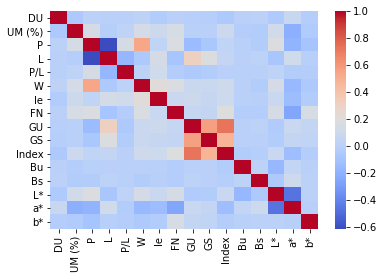

In [7]:
corr = df.corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

## Analisando produtos

In [9]:
df.groupby('Produto')['Produto'].count().sort_values(ascending=False)

Produto
BISCOITO            2353
MASSA ESPECIAL      1429
MASSA INTEIRA       1406
MASSA COMUM          760
BISCOITO SALGADO     288
MASSA INTEIRA A      165
WAFER                142
BISCOITO DOCE         53
MASSA INTEGRAL        23
GRANODURO             17
BISCOITO CRACKER       8
Name: Produto, dtype: int64

In [12]:
df.groupby('Produto')['Parecer'].value_counts()

Produto           Parecer        
BISCOITO          Aprovado           1527
                  Ap. Condicional     762
                  Reprovado            64
BISCOITO CRACKER  Aprovado              5
                  Ap. Condicional       3
BISCOITO DOCE     Aprovado             40
                  Ap. Condicional      13
BISCOITO SALGADO  Aprovado            262
                  Ap. Condicional      24
                  Reprovado             2
GRANODURO         Aprovado             17
MASSA COMUM       Aprovado            594
                  Ap. Condicional     161
                  Reprovado             5
MASSA ESPECIAL    Aprovado           1071
                  Ap. Condicional     331
                  Reprovado            27
MASSA INTEGRAL    Aprovado             23
MASSA INTEIRA     Aprovado           1185
                  Ap. Condicional     207
                  Reprovado            14
MASSA INTEIRA A   Aprovado            110
                  Ap. Condicional      53


Analisando o resultado da análise exploratória sobre os tipos de produtos que teremos maior confiabilidade pela Rede Neural, Podemos verificar que a quantidade de dados não é suficiente para realizar uma classificação profunda, uma vez que produtos como GRANODURO e MASSA INTEGRAL temos apenas dados de testes aprovados, bem como o BISCOITO CRACKER e BISCOITO DOCE onde não temos resultados reprovados.

Portanto, o caminho será realizar a classificação pelo tipo de produto, ficando os grupos BISCOITO e MASSA.

In [26]:
df['Produto'] = df['Produto'].replace(['BISCOITO CRACKER', 'BISCOITO DOCE', 'BISCOITO SALGADO'], 'BISCOITO')


In [27]:
df['Produto'] = df['Produto'].replace(['GRANODURO', 'MASSA COMUM', 'MASSA ESPECIAL', 'MASSA INTEGRAL', 'MASSA INTEIRA', 'MASSA INTEIRA A'], 'MASSA')

In [28]:
df.sample(20)

,Empresa,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*,Produto,Parecer
6548,COOPAVEL,28,12.3,128.0,58.0,2.21,279.0,53.6,292.0,32.45,10.85,95.35,0.97,1.10,89.45,0.89,11.22,MASSA,Aprovado
3830,COTRICAMPO,3,14.6,96.0,90.0,1.07,290.0,56.3,352.0,25.00,8.40,97.20,0.48,0.56,92.79,0.08,9.97,MASSA,Aprovado
2763,COOPAVEL,1,12.6,137.0,56.0,2.45,262.0,42.2,329.0,30.75,10.15,95.85,0.92,1.05,89.84,0.16,11.52,BISCOITO,Aprovado
361,COOPAVEL,0,13.8,139.0,66.0,2.11,337.0,55.5,353.0,31.15,10.55,95.95,0.66,0.76,91.20,0.34,10.92,MASSA,Aprovado
2876,INFASA,2,14.5,121.0,74.0,1.64,305.0,52.1,322.0,28.95,9.75,89.50,0.46,0.53,92.60,-0.18,10.76,MASSA,Aprovado
2275,COOPAVEL,1,13.2,117.0,79.0,1.48,286.0,47.6,226.0,31.60,10.70,98.20,1.03,1.18,89.17,0.51,10.93,BISCOITO,Aprovado
2229,MOCCA,1,13.3,123.0,52.0,2.37,261.0,59.2,331.0,24.90,9.80,98.70,0.41,0.47,93.15,-0.60,10.72,MASSA,Aprovado
4871,TKS MOLINERA DEL SUR,4,13.1,0.0,0.0,0.00,0.0,0.0,500.0,33.10,11.80,95.40,0.68,0.78,87.07,-1.39,27.03,MASSA,Aprovado
3441,COTRICAMPO,2,13.3,110.0,60.0,1.83,218.0,42.6,315.0,29.10,9.40,89.90,0.00,0.00,89.55,0.47,11.25,BISCOITO,Aprovado
6278,MOCCA,13,13.6,130.0,71.0,1.83,311.0,50.3,324.0,27.00,9.45,96.35,0.38,0.43,93.10,-0.93,13.08,MASSA,Aprovado


## Analisando empresas

In [31]:
dados = df.groupby('Empresa')['Parecer'].value_counts()

In [45]:
dados.filter(like='Aprovado', axis=0).sort_values(ascending=False)

Empresa                 Parecer 
MOCCA                   Aprovado    1115
COOPAVEL                Aprovado    1079
TRADIÇÃO                Aprovado     784
INFASA                  Aprovado     477
FILADELFIA              Aprovado     256
COTRICAMPO              Aprovado     222
AGRÁRIA                 Aprovado     174
COAMO                   Aprovado     100
ITAIPU                  Aprovado      97
ALFA                    Aprovado      83
REGIO                   Aprovado      71
NORDESTE                Aprovado      67
BATAVO (FRISIA)         Aprovado      63
CAPICI                  Aprovado      48
CONSOLATA               Aprovado      40
SPECHT                  Aprovado      30
RIO AZUL (REFARE)       Aprovado      29
CIDADE BELLA            Aprovado      25
MOINHO RIQUEZA - SOMOR  Aprovado      24
BUNGE                   Aprovado      22
COOPAVEL (HILÉIA)       Aprovado      21
AURI VERDE - REALTA     Aprovado      21
MISSIONEIRO             Aprovado      17
COOPER ITAIPU           

In [46]:
dados.filter(like='Ap. Condicional', axis=0).sort_values(ascending=False)

Empresa            Parecer        
COOPAVEL           Ap. Condicional    399
MOCCA              Ap. Condicional    393
FILADELFIA         Ap. Condicional    159
ITAIPU             Ap. Condicional    151
TRADIÇÃO           Ap. Condicional     91
INFASA             Ap. Condicional     91
REGIO              Ap. Condicional     67
ALFA               Ap. Condicional     48
CONSOLATA          Ap. Condicional     45
BATAVO (FRISIA)    Ap. Condicional     38
DONA ALDA          Ap. Condicional     35
RIO AZUL (REFARE)  Ap. Condicional     16
COAMO              Ap. Condicional     15
SPECHT             Ap. Condicional     12
MISSIONEIRO        Ap. Condicional     11
ROTTA              Ap. Condicional      4
RIQUEZA            Ap. Condicional      3
COTRIGUAÇU         Ap. Condicional      3
NORDESTE           Ap. Condicional      2
COTRICAMPO         Ap. Condicional      2
CAMPEA             Ap. Condicional      1
Name: Parecer, dtype: int64

In [47]:
dados.filter(like='Reprovado', axis=0).sort_values(ascending=False)

Empresa            Parecer  
MOCCA              Reprovado    46
COOPAVEL           Reprovado    16
FILADELFIA         Reprovado    15
ITAIPU             Reprovado     8
INFASA             Reprovado     6
REGIO              Reprovado     5
DONA ALDA          Reprovado     4
ALFA               Reprovado     3
RIO AZUL (REFARE)  Reprovado     2
MISSIONEIRO        Reprovado     2
COTRICAMPO         Reprovado     2
CONSOLATA          Reprovado     2
BATAVO (FRISIA)    Reprovado     2
TRADIÇÃO           Reprovado     1
MOINHO TRES        Reprovado     1
Name: Parecer, dtype: int64